# Toronto Housing Market
## Why are houses so expensive in Toronto? 

There has been a lot of public debate recently about housing prices in Toronto. The cost of living is becoming unaffordable for many Torontonians and home ownership has become unfeasible for a growing percentage of the population. 

There have been lots of explanations offered and solutions presented from across the political spectrum, yet the data underlying many of these arguments seems surprisingly scarce and the arguments surprisingly non-quantitative. 

## The aim of this analysis is to 
1. Understand the most important cause of high prices
2. Suggest one or two policy proposals, based on the findings above, that are most likely to reduce housing prices by the largest magnitude. 


## City of Toronto
The map below shows the geographical boundaries of the City of Toronto highlighted in yellow. The Greater Toronto Area also includes the Halton, Peel, York and Durham regions. But, for the purposes of this analysis, we will *only* work with the data for the City of Toronto, and *not* GTA. 
(Many of the trends may not necessarily carry over to other regions outside of City of Toronto) 

<img src='images/cityoftorontomap.png' width='800' height='1000'>


In [1]:
# Load dependencies

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import urllib.request
import time

import seaborn as sns
from scipy import stats

plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Housing Market 

First, we examine the status quo. How have the prices behaved over the last two decades  [<sup>1</sup>](#fn1)



In [2]:
avg_sale_df = pd.read_csv('C:/Users/MMS-012/Documents/GitHub/TorontoHousingMarket/datasets/toronto-avgsales-avgsalesprice.csv')
avg_sale_df

,Year,Sales,Average Sale Price
0,2000,58343,243255
1,2001,67612,251508
2,2002,74759,275231
3,2003,78898,293061
4,2004,83501,315231
5,2005,84145,335907
6,2006,83084,351941
7,2007,93193,376236
8,2008,74505,379080
9,2009,86980,395234


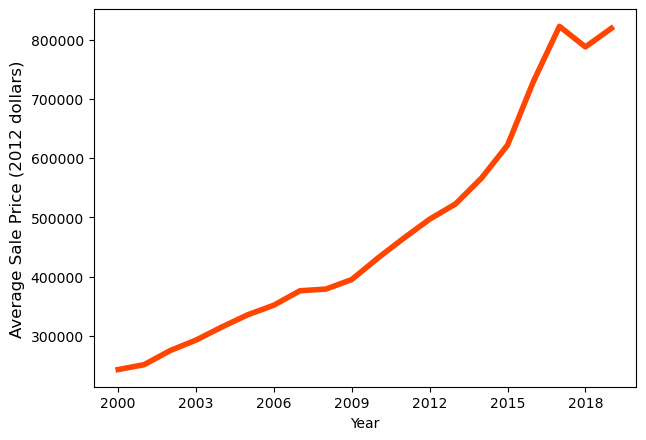

In [3]:
avg_sale_df.plot(x='Year', y='Average Sale Price', color='orangered', linewidth=4, legend=False)
plt.ylabel('Average Sale Price (2012 dollars)', fontsize=12)
listofyears = np.arange(2000, 2020)
plt.xticks(listofyears)
plt.locator_params(axis='x', nbins=9)



## The average sale price in Toronto has increased by 237% in the last two decades, with a much dramatic rise in the last 10 years. 

# 1. Income and Demographics

## lets check population growth over the years

Toronto is one of the fastest growing metropolitan in North America. 

The table below shows census data for the City of Toronto over the last two decades [<sup>2</sup>](#fn2)
And the bar chart below shows change in population as a percentage of 2001. 

In [102]:
pop_df = pd.read_csv("datasets/toronto-population.csv")
pop_df['Change'] = pop_df['Population'].diff()
pop_df

,Year,Population,Change
0,2001,2481494,NaN
1,2006,2503281,21787.0
2,2011,2615060,111779.0
3,2016,2731571,116511.0


Text(0.5, 0, 'Year')

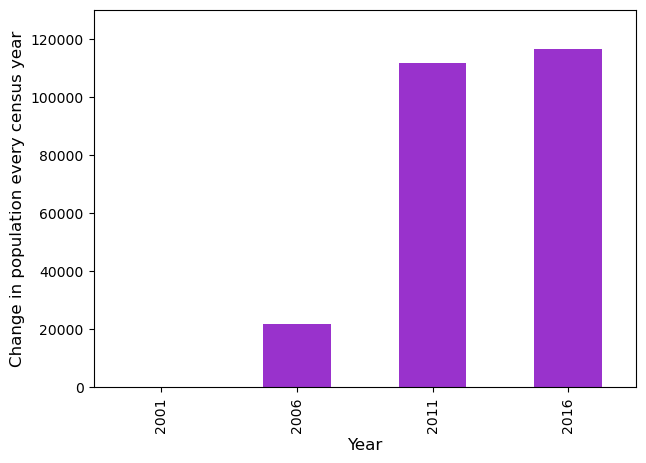

In [103]:
pop_df.plot(x='Year', y='Change', kind='bar', color='darkorchid', legend=False)
plt.ylim(0, 130000)
plt.ylabel('Change in population every census year', fontsize=12)
plt.xlabel('Year', fontsize=12)

Population grew by 4.46% from 2011 to 2016, from 2,615,060 people to 2,731,571 in 2016, indicating an average annual growth close to 23000 people, which is comparable to the national growth rate of 5.9% [<sup>3</sup>](#fn3)



According to a projection study done by Ontario Ministry of Finance [<sup>7</sup>](#fn7),

> Within the GTA, Toronto’s population is projected to rise from 2.97 million in 2019 to 3.73 million in 2046, an increase of 25.9 per cent, slower than the provincial growth rate.



As population increases, demand and competition for housing is expected to increase

##  Lets take a look at how the median income of households has changed, and compare that to the ownership costs of a typical home in Toronto. 

In [35]:
med_income_df = pd.read_csv('datasets/toronto-median-income.csv')
med_income_df['median income (all households)'] = med_income_df['median income (all households)'].str.replace(',', '').astype(int)
med_income_df

,year,median income (all households)
0,2001,57900
1,2002,58200
2,2003,58500
3,2004,60100
4,2005,61800
5,2006,63800
6,2007,66560
7,2008,68120
8,2009,66790
9,2010,68110


In [36]:
benchmark_household_df = pd.read_csv('datasets/MLS-BenchmarkPrices-AllHouseholdTypes-composite.csv')
benchmark_household_df

,Year,Composite Benchmark Price
0,2005,313984
1,2006,329542
2,2007,348442
3,2008,361567
4,2009,362500
5,2010,399434
6,2011,424734
7,2012,453500
8,2013,471834
9,2014,507409


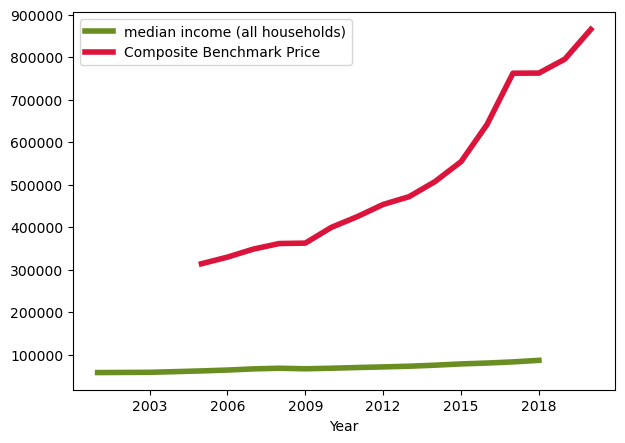

In [37]:
ax = med_income_df.plot(x='year', y='median income (all households)',  color='olivedrab', linewidth=4)
benchmark_household_df.plot(ax=ax, x='Year', y='Composite Benchmark Price' , color='crimson', linewidth=4)
listofyears = np.arange(2000, 2020)
plt.xticks(listofyears)
plt.locator_params(axis='x', nbins=9)

## Taking into consideration the growth between years 2005 to 2018 (for which we have both income and ownership cost data), median household income grew only 40% while average home ownership costs grew 143% reducing movement of middle-income households from rental housing to ownership.


# 2. A look at the lending rates for mortgages and credit accessibility

lowered mortgage lending rates and relaxed insurance rules allow for more people to enter the market. Thus driving up the demand, which if not increased in proportion to the supply, home prices will increase! 

A more accessible credit is kind of like an incentive for people to stop renting, and actually buying and calling a home theirs, by taking advantage of more flexible and affordable borrowing terms. 


In [38]:
lend_rate_df = pd.read_csv('datasets/canada-lendingrates.csv')
lend_rate_df

,Year,Lending Rate
0,2000,8.20
1,2001,7.18
2,2002,6.70
3,2003,6.04
4,2004,5.80
5,2005,5.48
6,2006,5.98
7,2007,6.36
8,2008,6.41
9,2009,5.06


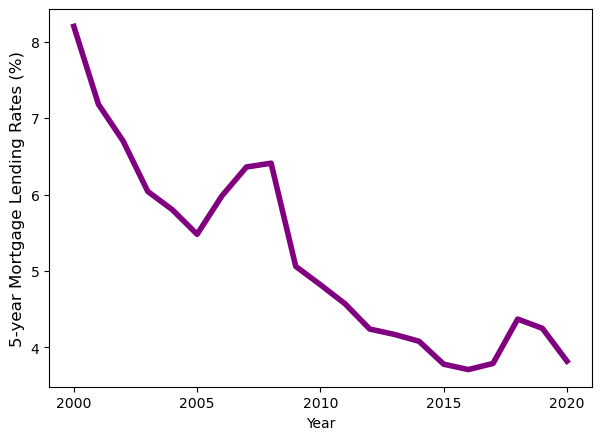

In [39]:
lend_rate_df.plot(x='Year', y='Lending Rate', legend=False, color='purple', linewidth=4)
plt.ylabel('5-year Mortgage Lending Rates (%)', fontsize=12)
plt.locator_params(axis='x', nbins=5)

The above graph shows the steep decline of mortgage lending rates in the last two decades, with a couple of local maxima around the time of recession in 2008 and a smaller one around 2018, before it falls further in 2020 during Covid-19 pandemic. 


A lower mortgage rate means an increase in buying power because a person can now borrow a larger sum of money, while keeping the monthly payments same! 

The chart below the shows the inverse relationship between lending rates and house prices. 

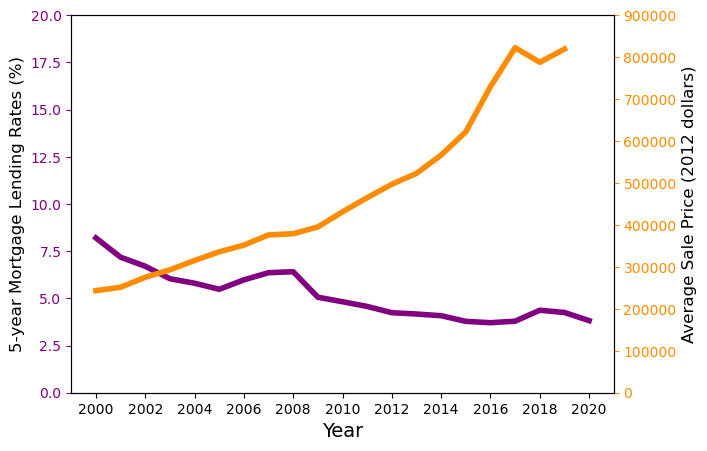

In [40]:
fig,ax = plt.subplots()

ax.plot(lend_rate_df['Year'],lend_rate_df['Lending Rate'], color='purple', linewidth=4)
ax.set_ylim(0, 20)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('5-year Mortgage Lending Rates (%)', fontsize=12)
ax.tick_params(axis='y', colors='purple')

ax2=ax.twinx()
ax2.plot(avg_sale_df['Year'], avg_sale_df['Average Sale Price'], color='darkorange', linewidth=4)
ax2.set_ylim(0, 900000)
ax2.set_ylabel('Average Sale Price (2012 dollars)', fontsize=12)
plt.locator_params(axis='x', nbins=12)
ax2.tick_params(axis='y', colors='darkorange')

There is a strong inverse relationship between lending rates and sale price for the City of Toronto, but it is not a factor that can be used to understand the rise in home prices. Since, for an average person, the actual cost of owning a home has not changed significantly. Even though houses are expensive today, than 20 years ago, monthly costs are similar today to those in 2000. 

# 3. Construction and Development costs

These include the costs incurred due to construction material and the labour wages, which are expected to change as economies change. As these costs increase, they can drive up the home prices. 

Let us look at the data, and see their significance. 

According to Statistics Canada, 

> The New Housing Price Index (NHPI) is a monthly series that measures changes over time in the contractors' selling prices of new residential houses, where detailed specifications pertaining to each house remain the same between two consecutive periods.

The graph below shows the New Housing Price Index (2016=100)[<sup>4</sup>](#fn4)




In [41]:
new_house_df = pd.read_csv('datasets/newhousingpriceindex.csv')
new_house_df

,Year,House Only,Land Only
0,2001,52.7,78.7
1,2002,55.5,78.9
2,2003,59.0,79.1
3,2004,63.2,80.9
4,2005,66.1,84.5
5,2006,68.9,86.9
6,2007,71.0,88.4
7,2008,74.0,90.1
8,2009,74.0,90.3
9,2010,77.0,89.4


Text(0, 0.5, 'New House Price Index (2016=100)')

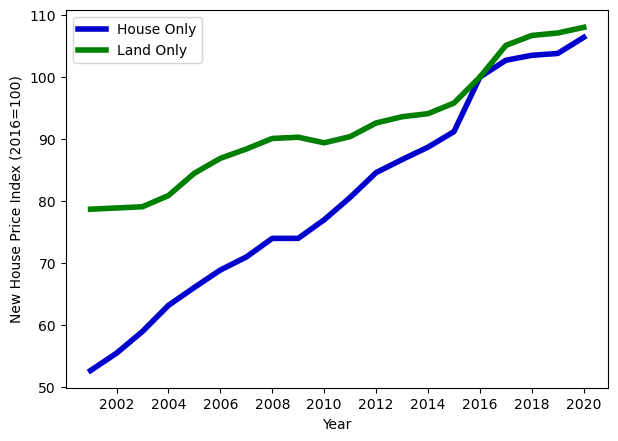

In [42]:
ax4 = new_house_df.plot(x='Year', y='House Only', color='mediumblue', linewidth=4)
new_house_df.plot(ax=ax4, x='Year', y='Land Only', color='green', linewidth=4)
plt.locator_params(axis='x', nbins=12)
plt.ylabel('New House Price Index (2016=100)')


The New Housing Price Index graph shows a steady increase in both Land and New House prices, with 2016 as the reference year at 100. The point to note is that house prices have had a much steeper increase in price than the land prices themselves. 

This index acts as an alias to the prices. Therefore, the price of the land contributes about 70%, on an average, in the increase of house prices. 


In the recent years, 

house: 106.4-52.7 = 53.7
land: 108-78.7 = 29.3

accounts for almost 55% of the increase! 


house 106.4 -100 = 6.4
land: 108 -100 = 8 

80% of the price index! 






The cost of labour can also be a driving factor for higher home prices in Toronto. Labour can be costly in highly sought after locations, such as metropolitan areas like Toronto.


Construction Union Wage Rate Index [<sup>5</sup>](#fn5)


    Year  Wage Index
0   2000        82.7
1   2001        84.8
2   2002        87.5
3   2003        89.7
4   2004        92.5
5   2005        95.5
6   2006        98.0
7   2007       100.0
8   2008       104.0
9   2009       107.8
10  2010       110.7
11  2011       113.5
12  2012       116.4
13  2013       119.4
14  2014       122.3
15  2015       125.9
16  2016       128.5
17  2017       130.7
18  2018       132.7


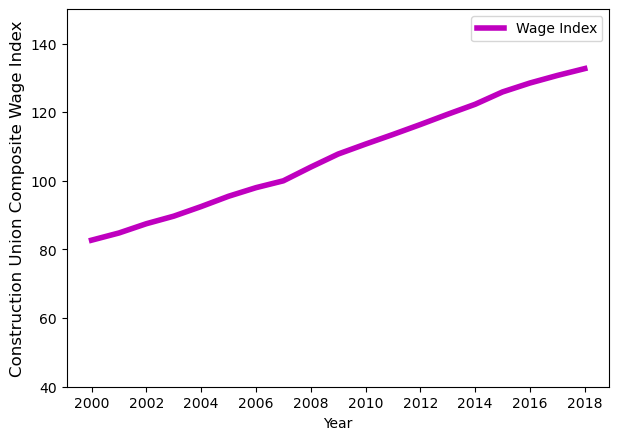

In [43]:
wage_df = pd.read_csv('datasets/toronto-wageindex.csv')
print(wage_df)
wage_df.plot(x='Year', y ='Wage Index', color='m', linewidth=4 )
plt.ylabel('Construction Union Composite Wage Index', fontsize=12)
plt.ylim(40,150)
plt.locator_params(axis='x', nbins=12)

The construction union composite wage index shows an increase by 60%. 

### Average Development Charges and Housing prices - comparison of 2002 and 2010 data

   Year  Avg House Price  Avg Development Charge
0  2002           275231                    5148
1  2010           431262                   12281


Text(0, 0.5, 'Price (2012 dollars)')

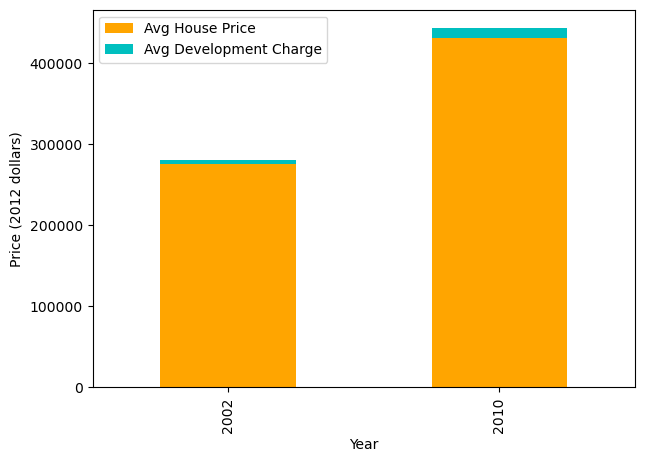

In [46]:
dev_df = pd.read_csv('datasets/toronto-devcharges.csv')
print(dev_df)
ax = dev_df.plot.bar(x='Year', stacked=True, color={'orange', 'c'})
ax.set_ylabel('Price (2012 dollars)')

In 2002, development charge was 1.9% of the average home price, while in 2010 it was 2.9%, an increase of 140%. 

increase in DC 7133
increase in price 156031

increase fraction 4.6%

Between 2002 and 2010, even though the average house price increased by 57%,  the fractional increase in development charges is very small. 

### The increase in development charges accounts for only 4.6% of the increase in home prices, which is very insignificant! 

### [ The increase in these charges accounts for only a small fraction of the increase in home prices. ]





## 4. Land Availability 

Toronto is a highly sought after location to live in, and thus land available for residential purposes is becoming scarcer each passing day. This can reduce the supply of housing available, and drive up housing prices. 



## 5. Supply and Stock



New homes beginning to be constructed [<sup>6</sup>](#fn6)



In [45]:
supply_df = pd.read_csv('datasets/toronto-starts-underconstruction-completions.csv')
supply_df

,Year,Housing starts,Housing under construction,Housing completions
0,2000,38982,30273,33740
1,2001,41017,34305,37138
2,2002,43805,33094,45170
3,2003,45475,39907,38644
4,2004,42115,42148,39620
5,2005,41596,44305,39296
6,2006,37080,42654,38121
7,2007,33293,45470,30357
8,2008,42212,50823,36258
9,2009,25949,48361,28356


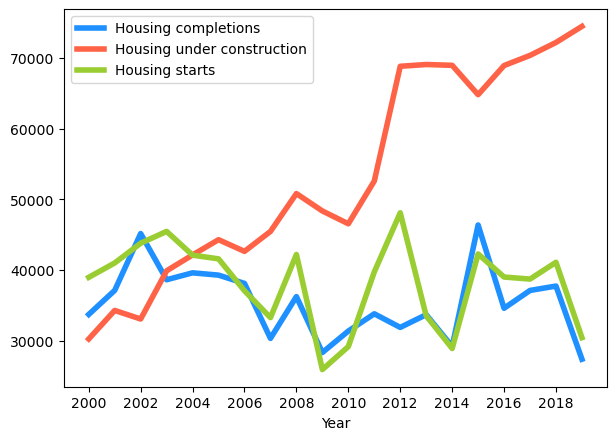

In [55]:
ax5 = supply_df.plot(x='Year', y='Housing completions', color='dodgerblue', linewidth=4)
supply_df.plot(ax=ax5, x='Year', y='Housing under construction', color='tomato', linewidth=4)
supply_df.plot(ax=ax5, x='Year', y='Housing starts', color='yellowgreen', linewidth=4)
plt.locator_params(axis='x', nbins=12)

The stock of houses that have completed construction, which means that they are available to buy, have not shown an appreciable increase over the last two decades in Toronto. In fact, no of houses completed in 2019 was lower than those completed in 2000! 

New houses starting to be constructed have gone down, again 2019 numbers are lower than 2000. 

The most alarming situation is that the number of houses under construction have increased very much -- by 146% since 2000




Between 2011 and 2016, according to the Census results [above](#lets-check-population-growth-over-the-years) , we added 1.17 million


# Conclusion

We examined many factors affecting Toronto's housing market. We looked at many factors including population growth, income trends, stock of houses (both new and in the pipeline), labour and development costs, land prices and mortgage lending rates. 

While all of these factors contribute in the increase of house prices, they do so in varying degrees of time and  intensity. 

* We saw that immense population growth in the City of Toronto. It has grown by 4 to 5% between 2011 and 2016, it is projected to grow by 


## Most important factor for rise in house prices 


### Sources of Error
* The data obtained from various public sources referenced [below](#References)
* Sampling Error: The data ob



## Recommendations and next steps given initial data analysis (with my limited expertise)

* houses under construction should be completed asap! 



# References




<span id="fn1">1. Source: Toronto Regional Real Estate Board Historic Archive </span>


<span id="fn2">2. Sources:
(a) "Population and dwelling counts, for Canada, census metropolitan areas, census agglomerations and census subdivisions (municipalities), 2006 and 2001 censuses - 100% data". Statistics Canada, 2006 Census of Population. 
(b) "Population and dwelling counts, for Canada, census metropolitan areas, census agglomerations and census subdivisions (municipalities), 2011 and 2006 censuses". Statistics Canada, 2011 Census of Population.
(c) "Toronto population count". Statistics Canada, 2016 Census of Population. </span>



<span id="fn3">3. Source:  Statistics Canada: https://www12.statcan.gc.ca/census-recensement/2011/as-sa/fogs-spg/Facts-cma-eng.cfm?LANG=Eng&GK=CMA&GC=535) </span>




<span id="fn4">4. Source: Statistics Canada. Table 18-10-0205-01 New housing price index</span>


<span id="fn5">5. Source: Statistics Canada. Table 18-10-0051-01 Construction union wage rates index, monthly</span>



<span id="fn6">6. Source: Statistics Canada. Table 34-10-0134-01 Canada Mortgage and Housing Corporation, housing starts, under construction and completions in selected census metropolitan areas, annual</span>

<span id="fn7">7. Source: Ontario Population Projections Update, 2019–2046 https://www.fin.gov.on.ca/en/economy/demographics/projections/ </span>